# Importing Dependencies

In [21]:
import pandas as pd
from neuralprophet import NeuralProphet, set_log_level
from matplotlib import pyplot as plt
import pickle


# Read in Data and Process Dates

In [22]:
df = pd.read_csv('weather.csv')
df.head()

,Date,Temp Max,Temp Min,Temp Max.1,Temp Min.1,Temp avg,Rain avg
0,01-01-1951,25.059999,6.59,27.860001,10.54,17.5125,0.0
1,02-01-1951,25.910000,7.51,28.760000,10.57,18.1875,0.0
2,03-01-1951,26.469999,8.53,29.969999,12.05,19.2550,0.0
3,04-01-1951,26.809999,8.84,29.530001,11.88,19.2650,0.0
4,05-01-1951,26.280001,8.48,28.690001,10.57,18.5050,0.0


In [23]:
df.columns
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')
df.dtypes

Date          datetime64[ns]
Temp Max             float64
Temp Min             float64
Temp Max.1           float64
Temp Min.1           float64
Temp avg             float64
Rain avg             float64
dtype: object

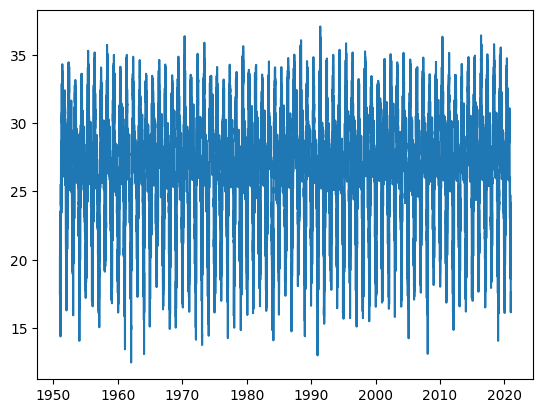

In [24]:
df['Year'] = df['Date'].apply(lambda x: x.year)
plt.plot(df['Date'], df['Temp avg'])
plt.show()

In [25]:
data = df[['Date', 'Temp avg']] 
data.dropna(inplace=True)
data.columns = ['ds', 'y'] 


WARNING - (py.warnings._showwarnmsg) - C:\Users\makwa\AppData\Local\Temp\ipykernel_5692\2353254334.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy




In [26]:
data

,ds,y
0,1951-01-01,17.512500
1,1951-01-02,18.187500
2,1951-01-03,19.255000
3,1951-01-04,19.265000
4,1951-01-05,18.505000
...,...,...
25563,2020-12-27,20.548496
25564,2020-12-28,16.709542
25565,2020-12-29,16.150014
25566,2020-12-30,16.644573


# 2. Training the Model

In [27]:
m = NeuralProphet()

In [28]:
data_train, data_val = m.split_df(data, valid_p=0.2)

print("Dataset size:", len(data))
print("Train dataset size:", len(data_train))
print("Validation dataset size:", len(data_val))

WARNING - (py.warnings._showwarnmsg) - c:\Users\makwa\AppData\Local\Programs\Python\Python312\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.996% of the data.


INFO - (NP.df_utils._infer_frequency) - Dataframe freq automatically defined as D
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column


Dataset size: 25568
Train dataset size: 20455
Validation dataset size: 5113


In [29]:
x=m.fit(data_train, validation_df=data_val, freq='D', progress=None)
x

WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
WARNING - (py.warnings._showwarnmsg) - c:\Users\makwa\AppData\Local\Programs\Python\Python312\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.995% of the data.
WARNING - (py.warnings._showwarnmsg) - c:\Users\makwa\AppData\Local\Programs\Python\Python312\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


WARNING - (py.warnings._showwarnmsg) - c:\Users\makwa\AppData\Local\Programs\Python\Python312\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future 

Finding best initial lr:   0%|          | 0/257 [00:00<?, ?it/s]

WARNING - (py.warnings._showwarnmsg) - c:\Users\makwa\AppData\Local\Programs\Python\Python312\Lib\site-packages\pytorch_lightning\trainer\call.py:48: UserWarning:

Detected KeyboardInterrupt, attempting graceful shutdown...




,MAE_val,RMSE_val,Loss_val,RegLoss_val,epoch,MAE,RMSE,Loss,RegLoss
0,2.128661,2.667107,0.028375,0.0,0,8.347805,12.550334,0.226041,0.0
1,1.165297,1.493771,0.008903,0.0,1,1.302876,1.665940,0.008352,0.0
2,1.156231,1.478210,0.008742,0.0,2,1.230344,1.584050,0.007525,0.0
3,1.221965,1.550838,0.009596,0.0,3,1.233633,1.586856,0.007574,0.0
4,1.263670,1.604540,0.010278,0.0,4,1.239589,1.596772,0.007680,0.0
5,1.183587,1.517902,0.009202,0.0,5,1.272295,1.639117,0.008107,0.0
6,1.281592,1.643275,0.010782,0.0,6,1.310745,1.679156,0.008531,0.0
7,1.316520,1.682370,0.011283,0.0,7,1.320625,1.697287,0.008708,0.0
8,1.486843,1.868396,0.013960,0.0,8,1.354232,1.733820,0.009109,0.0
9,1.402179,1.775963,0.012583,0.0,9,1.377222,1.757204,0.009359,0.0


In [ ]:
forecast=m.predict(data)
m.plot(forecast)

WARNING - (py.warnings._showwarnmsg) - c:\Users\makwa\AppData\Local\Programs\Python\Python312\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.




INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.996% of the data.
WARNING - (py.warnings._showwarnmsg) - c:\Users\makwa\AppData\Local\Programs\Python\Python312\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


WARNING - (py.warnings._showwarnmsg) - c:\Users\makwa\AppData\Local\Programs\Python\Python312\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
WARNING - (py.warnings._showwarnmsg) - c:\Users\makwa\AppData\Local\Programs\Python\Python312\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an al

Predicting: 0it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - c:\Users\makwa\AppData\Local\Programs\Python\Python312\Lib\site-packages\neuralprophet\plot_forecast_plotly.py:100: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result




FigureWidgetResampler({
    'data': [{'fill': 'none',
              'line': {'color': 'rgba(45, 146, 255, 1.0)', 'width': 2},
              'mode': 'lines',
              'name': '<b style="color:sandybrown">[R]</b> yhat1 <i style="color:#fc9944">~26D</i>',
              'type': 'scatter',
              'uid': 'ef7a58e1-e2be-437e-97db-b68492f54920',
              'x': array([datetime.datetime(1951, 1, 1, 0, 0),
                          datetime.datetime(1951, 1, 16, 0, 0),
                          datetime.datetime(1951, 2, 9, 0, 0), ...,
                          datetime.datetime(2020, 11, 20, 0, 0),
                          datetime.datetime(2020, 12, 17, 0, 0),
                          datetime.datetime(2020, 12, 31, 0, 0)], dtype=object),
              'y': array([20.141476, 19.67832 , 21.416979, ..., 24.194494, 21.379543, 20.278032],
                         dtype=float32)},
             {'marker': {'color': 'black', 'size': 4},
              'mode': 'markers',
              

In [ ]:
m.plot_components(forecast)

WARNING - (py.warnings._showwarnmsg) - c:\Users\makwa\AppData\Local\Programs\Python\Python312\Lib\site-packages\neuralprophet\plot_forecast_plotly.py:410: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result


WARNING - (py.warnings._showwarnmsg) - c:\Users\makwa\AppData\Local\Programs\Python\Python312\Lib\site-packages\neuralprophet\plot_forecast_plotly.py:410: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result


WARNING - (py.warnings._showwarnmsg) - c:\Users\makwa\AppData\Local\Programs\Python\Python312\Lib\site-packages\neuralprophet\plot_forecast_plotly.py:410: FutureWarning:

The behavior of DatetimePropert

FigureWidgetResampler({
    'data': [{'line': {'color': '#2d92ff', 'width': 2},
              'mode': 'lines',
              'name': '<b style="color:sandybrown">[R]</b> Trend <i style="color:#fc9944">~26D</i>',
              'showlegend': False,
              'type': 'scatter',
              'uid': '9703925a-32a3-4bbd-b055-663ff14c9393',
              'x': array([datetime.datetime(1951, 1, 1, 0, 0),
                          datetime.datetime(1951, 1, 2, 0, 0),
                          datetime.datetime(1951, 2, 22, 0, 0), ...,
                          datetime.datetime(2020, 11, 21, 0, 0),
                          datetime.datetime(2020, 12, 17, 0, 0),
                          datetime.datetime(2020, 12, 31, 0, 0)], dtype=object),
              'xaxis': 'x',
              'y': array([26.969095, 26.968761, 26.951656, ..., 27.157967, 27.159508, 27.16034 ],
                         dtype=float32),
              'yaxis': 'y'},
             {'line': {'color': '#2d92ff', 'width': 2},
 

In [ ]:
fu = m.make_future_dataframe(data, periods=1825)
fore = m.predict(fu)
fore.head()

WARNING - (py.warnings._showwarnmsg) - c:\Users\makwa\AppData\Local\Programs\Python\Python312\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.




INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.996% of the data.
WARNING - (py.warnings._showwarnmsg) - c:\Users\makwa\AppData\Local\Programs\Python\Python312\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


WARNING - (py.warnings._showwarnmsg) - c:\Users\makwa\AppData\Local\Programs\Python\Python312\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - c:\Users\makwa\AppData\Local\Programs\Python\Python312\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning:

Series.

Predicting: 0it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column


,ds,y,yhat1,trend,season_yearly,season_weekly
0,2021-01-01,None,20.217325,27.160400,-6.885121,-0.057953
1,2021-01-02,None,20.301151,27.160458,-6.939960,0.080651
2,2021-01-03,None,20.135098,27.160519,-6.990948,-0.034472
3,2021-01-04,None,20.151382,27.160576,-7.037923,0.028727
4,2021-01-05,None,20.038403,27.160637,-7.080641,-0.041595


In [ ]:

m.plot(fore)

WARNING - (py.warnings._showwarnmsg) - c:\Users\makwa\AppData\Local\Programs\Python\Python312\Lib\site-packages\neuralprophet\plot_forecast_plotly.py:98: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`


WARNING - (py.warnings._showwarnmsg) - c:\Users\makwa\AppData\Local\Programs\Python\Python312\Lib\site-packages\neuralprophet\plot_forecast_plotly.py:100: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result




FigureWidgetResampler({
    'data': [{'fill': 'none',
              'line': {'color': 'rgba(45, 146, 255, 1.0)', 'width': 2},
              'mode': 'lines',
              'name': '<b style="color:sandybrown">[R]</b> yhat1 <i style="color:#fc9944">~2D</i>',
              'type': 'scatter',
              'uid': 'd92892fe-6aac-4acc-9f39-36b885cc9272',
              'x': array([datetime.datetime(2021, 1, 1, 0, 0),
                          datetime.datetime(2021, 1, 2, 0, 0),
                          datetime.datetime(2021, 1, 3, 0, 0), ...,
                          datetime.datetime(2025, 12, 26, 0, 0),
                          datetime.datetime(2025, 12, 29, 0, 0),
                          datetime.datetime(2025, 12, 30, 0, 0)], dtype=object),
              'y': array([20.217325, 20.301151, 20.135098, ..., 20.743107, 20.614456, 20.478294],
                         dtype=float32)},
             {'marker': {'color': 'black', 'size': 4},
              'mode': 'markers',
              'n

In [ ]:

m.plot_components(fore)

WARNING - (py.warnings._showwarnmsg) - c:\Users\makwa\AppData\Local\Programs\Python\Python312\Lib\site-packages\neuralprophet\plot_forecast_plotly.py:283: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`


WARNING - (py.warnings._showwarnmsg) - c:\Users\makwa\AppData\Local\Programs\Python\Python312\Lib\site-packages\neuralprophet\plot_forecast_plotly.py:410: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result


WARNING - (py.warnings._showwarnmsg) - c:\Users\makwa\AppData\Local\Programs\Python\Python312\Lib\site-packages\neuralprophet\plot_forecast_plotly.py:410: FutureWarning:

The beha

FigureWidgetResampler({
    'data': [{'line': {'color': '#2d92ff', 'width': 2},
              'mode': 'lines',
              'name': '<b style="color:sandybrown">[R]</b> Trend <i style="color:#fc9944">~2D</i>',
              'showlegend': False,
              'type': 'scatter',
              'uid': 'c6f6649d-3132-464d-9aa1-23e62517035b',
              'x': array([datetime.datetime(2021, 1, 1, 0, 0),
                          datetime.datetime(2021, 1, 2, 0, 0),
                          datetime.datetime(2021, 1, 4, 0, 0), ...,
                          datetime.datetime(2025, 12, 27, 0, 0),
                          datetime.datetime(2025, 12, 28, 0, 0),
                          datetime.datetime(2025, 12, 30, 0, 0)], dtype=object),
              'xaxis': 'x',
              'y': array([27.1604  , 27.160458, 27.160576, ..., 27.268484, 27.268543, 27.268663],
                         dtype=float32),
              'yaxis': 'y'},
             {'line': {'color': '#2d92ff', 'width': 2},
   

# 4. Save Model and Reload


In [ ]:
with open('saved_model.pkl', "wb") as f:
    pickle.dump(m, f)

In [ ]:
with open('saved_model.pkl', "rb") as f:
    m = pickle.load(f)

In [ ]:
def restore_trainer(self):
        """
        Restore the trainer based on the forecaster configuration.
        """
        self.trainer, _ = utils.configure_trainer(
            config_train=self.config_train,
            config=self.trainer_config,
            metrics_logger=self.metrics_logger,
            early_stopping=self.early_stopping,
            accelerator=self.accelerator,
            metrics_enabled=bool(self.metrics),
        )

In [ ]:
m.restore_trainer()

In [ ]:

forecast = m.predict(data)
forecast.head()

WARNING - (py.warnings._showwarnmsg) - c:\Users\makwa\AppData\Local\Programs\Python\Python312\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.996% of the data.


WARNING - (py.warnings._showwarnmsg) - c:\Users\makwa\AppData\Local\Programs\Python\Python312\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

WARNING - (py.warnings._showwarnmsg) - c:\Users\makwa\AppData\Local\Programs\Python\Python312\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
WARNING - (py.warnings._showwarnmsg) - c:\Users\makwa\AppData\Local\Programs\Python\Python312\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed i

Predicting: 0it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column


,ds,y,yhat1,trend,season_yearly,season_weekly
0,1951-01-01,17.5125,20.141476,26.969095,-6.856349,0.028728
1,1951-01-02,18.1875,20.014069,26.968761,-6.913001,-0.041691
2,1951-01-03,19.2550,20.083057,26.968424,-6.965862,0.080495
3,1951-01-04,19.2650,19.897705,26.968090,-7.014867,-0.055517
4,1951-01-05,18.5050,19.849796,26.967754,-7.059762,-0.058197


In [14]:
plot1 = m.plot(forecast)

WARNING - (py.warnings._showwarnmsg) - c:\Users\makwa\AppData\Local\Programs\Python\Python312\Lib\site-packages\neuralprophet\plot_forecast_plotly.py:100: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result


